In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

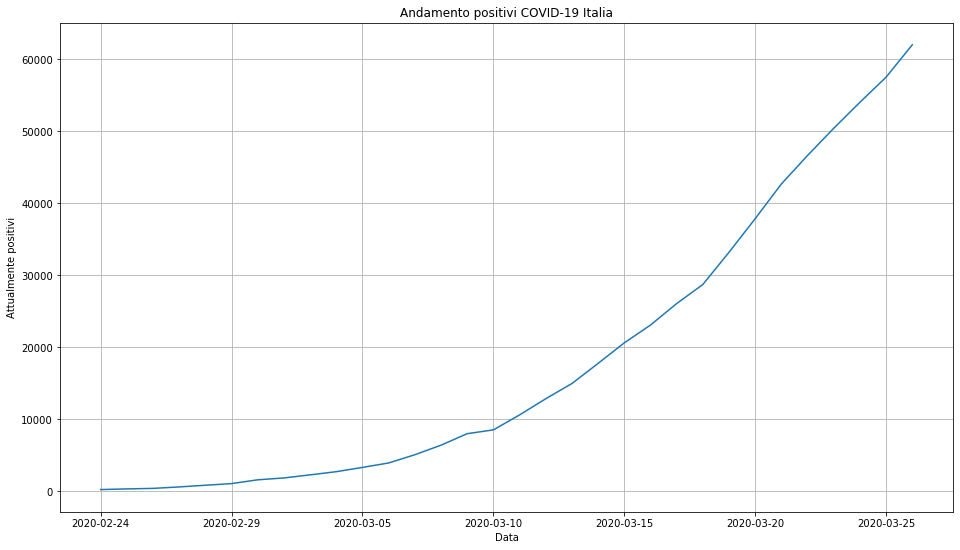

<Figure size 432x288 with 0 Axes>

In [244]:
#Load csv
pcDataset = pd.read_csv("../../Datasets/ProtezioneCivile/dpc-covid19-ita-andamento-nazionale_clean.csv")

#Get list of dates (X axis)
date = pcDataset["data"].tolist()

#Get list of positives to COVID19 (Y axis)
numeroPositivi = pcDataset["totale_attualmente_positivi"].tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, numeroPositivi)

#Customize
ax.set(xlabel = 'Data', ylabel = 'Attualmente positivi', title = 'Andamento positivi COVID-19 Italia')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Show plot
plt.show()

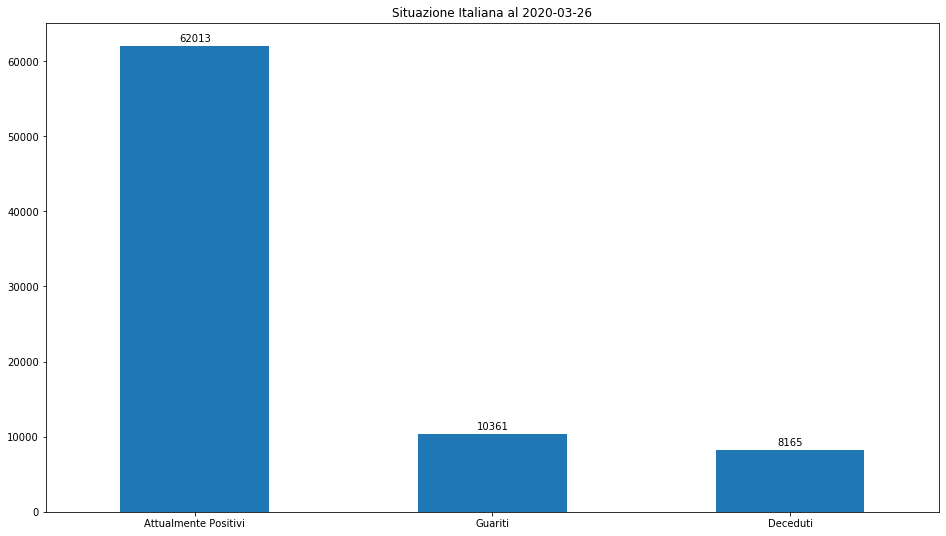

In [238]:
#Set X axis label
label = ["Attualmente Positivi", "Guariti", "Deceduti"]

#Get last day information about actual positives, healed and dead
lastDay = pcDataset[["totale_attualmente_positivi", "dimessi_guariti", "deceduti"]].iloc[-1]
#Get value of date
date = pcDataset['data'].iloc[-1]

#Create plot
fig, ax = plt.subplots(figsize=(16,9))
ax = lastDay.plot.bar(rot = 0, title="Situazione Italiana al %s" %(date))

#add x labels
plt.xticks(np.arange(3), label)

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max(lastDay.loc[['totale_attualmente_positivi', 'dimessi_guariti','deceduti']].tolist())) * 0.01

#write column values over them
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')

#Show plot
plt.show()

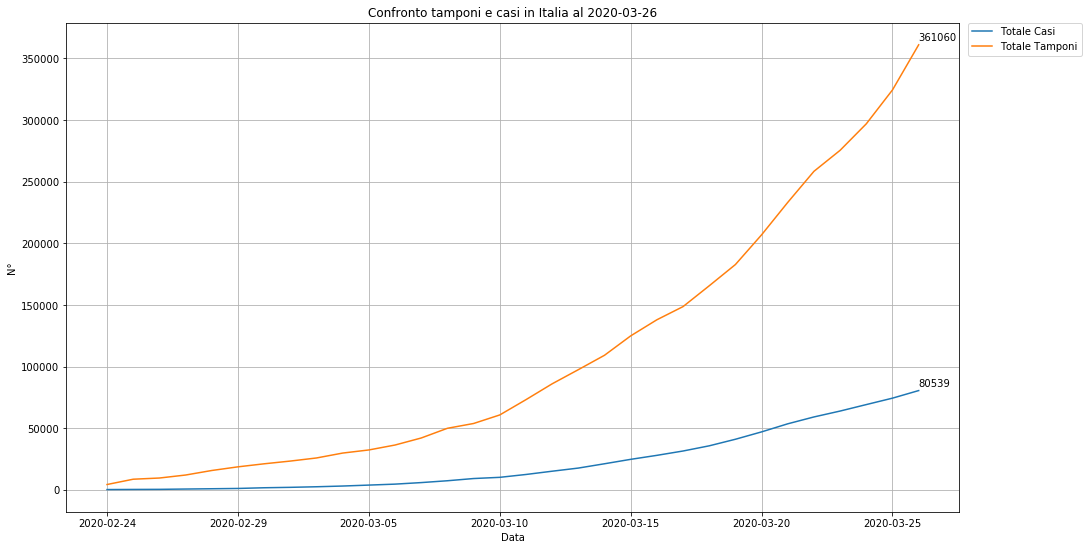

In [239]:
#Get list of dates (X axis)
date = pcDataset["data"].tolist()
maxDate = max(date)

#Get list of cumulative cases of COVID19 (Y axis)
totaleCasi = pcDataset["totale_casi"].tolist()
maxTotaleCasi = max(totaleCasi)

#Get list of cumulative tests to verify COVID19 (Y axis)
numeroTamponi = pcDataset["tamponi"].tolist()
maxNumeroTamponi = max(numeroTamponi)

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, totaleCasi,label='Totale Casi')
ax.plot(date, numeroTamponi,label='Totale Tamponi')

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max([maxTotaleCasi,maxNumeroTamponi])) * 0.01

#Add last label
ax.text(maxDate,maxTotaleCasi+not_so_beautifull_vertical_shift,str(maxTotaleCasi))
ax.text(maxDate,maxNumeroTamponi+not_so_beautifull_vertical_shift,str(maxNumeroTamponi))

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto tamponi e casi in Italia al '+maxDate )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

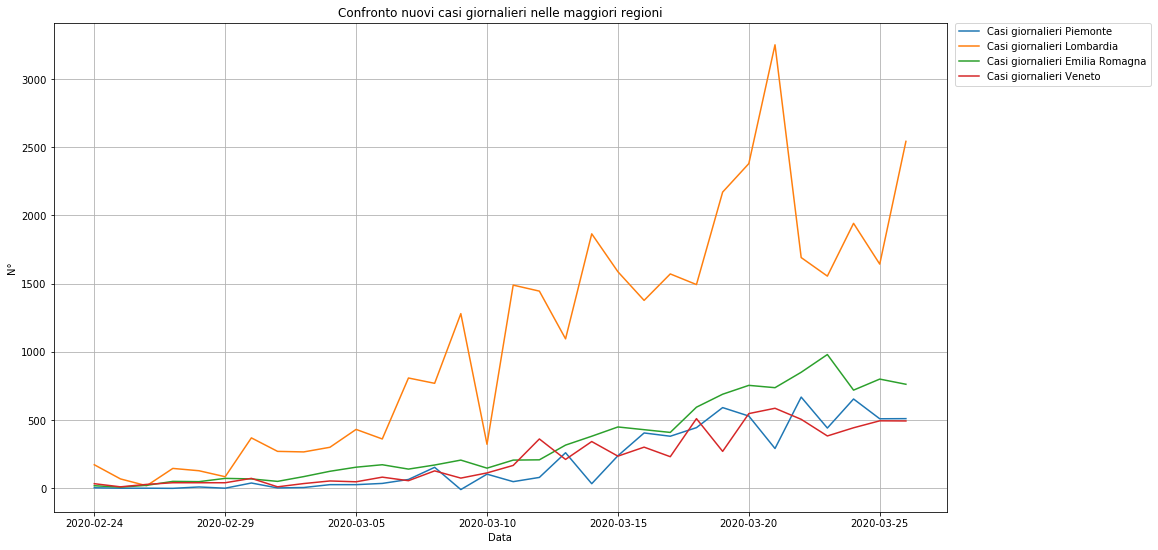

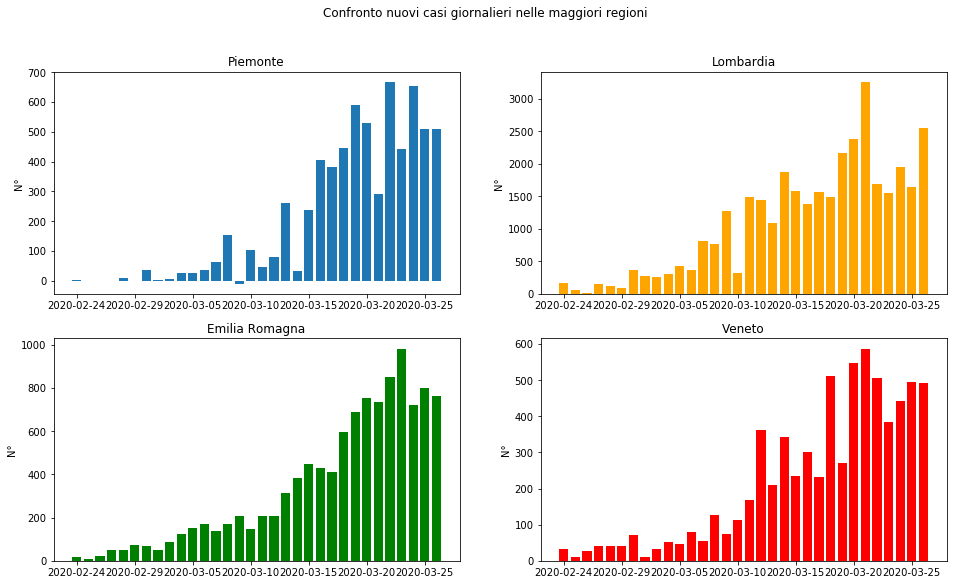

In [240]:
#Load csv
pcProvinciaDataset = pd.read_csv("../../Datasets/ProtezioneCivile/dpc-covid19-ita-regioni_clean.csv")

#Get list of dates (X axis)
date = pcProvinciaDataset["data"].unique().tolist()
maxDate = max(date)

#Get list of new confirmed cases (daily value) Piemonte
piemonte = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Piemonte']
totaleCasiPiemonte = piemonte['totale_casi'].values
diff = totaleCasiPiemonte[1:] -totaleCasiPiemonte[:-1]
piemonteNuoviCasi = [totaleCasiPiemonte.tolist()[0]]+diff.tolist()

#Get list of new confirmed cases (daily value) Lombardia
lombardia = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Lombardia']
totaleCasiLombardia = lombardia['totale_casi'].values
diff = totaleCasiLombardia[1:] -totaleCasiLombardia[:-1]
lombardiaNuoviCasi = [totaleCasiLombardia.tolist()[0]]+diff.tolist()

#Get list of new confirmed cases (daily value) Emilia Romagna
eRomagna = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Emilia Romagna']
totaleCasieRomagna = eRomagna['totale_casi'].values
diff = totaleCasieRomagna[1:] -totaleCasieRomagna[:-1]
eRomagnaNuoviCasi = [totaleCasieRomagna.tolist()[0]]+diff.tolist()

#Get list of new confirmed cases (daily value) Veneto
veneto = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Veneto']
totaleCasiVeneto = veneto['totale_casi'].values
diff = totaleCasiVeneto[1:] -totaleCasiVeneto[:-1]
venetoNuoviCasi = [totaleCasiVeneto.tolist()[0]]+diff.tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, piemonteNuoviCasi,label='Casi giornalieri Piemonte')
ax.plot(date, lombardiaNuoviCasi,label='Casi giornalieri Lombardia')
ax.plot(date, eRomagnaNuoviCasi,label='Casi giornalieri Emilia Romagna')
ax.plot(date, venetoNuoviCasi,label='Casi giornalieri Veneto')

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Confronto nuovi casi giornalieri nelle maggiori regioni' )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

#Create second plot
fig, ax = plt.subplots(2,2,figsize=(16,9))
ax[0,0].bar(date, piemonteNuoviCasi,label='Casi giornalieri Piemonte')
ax[0,1].bar(date, lombardiaNuoviCasi,label='Casi giornalieri Lombardia',color='orange')
ax[1,0].bar(date, eRomagnaNuoviCasi,label='Casi giornalieri Emilia Romagna',color='green')
ax[1,1].bar(date, venetoNuoviCasi,label='Casi giornalieri Veneto',color='red')

#Customize
label=['Piemonte','Lombardia','Emilia Romagna','Veneto']
fig.suptitle('Confronto nuovi casi giornalieri nelle maggiori regioni')
for axs,l in zip(ax.flat,label):
    axs.set(ylabel = 'N°', title=l)
    axs.xaxis.set_major_locator(MultipleLocator(5))


plt.show()

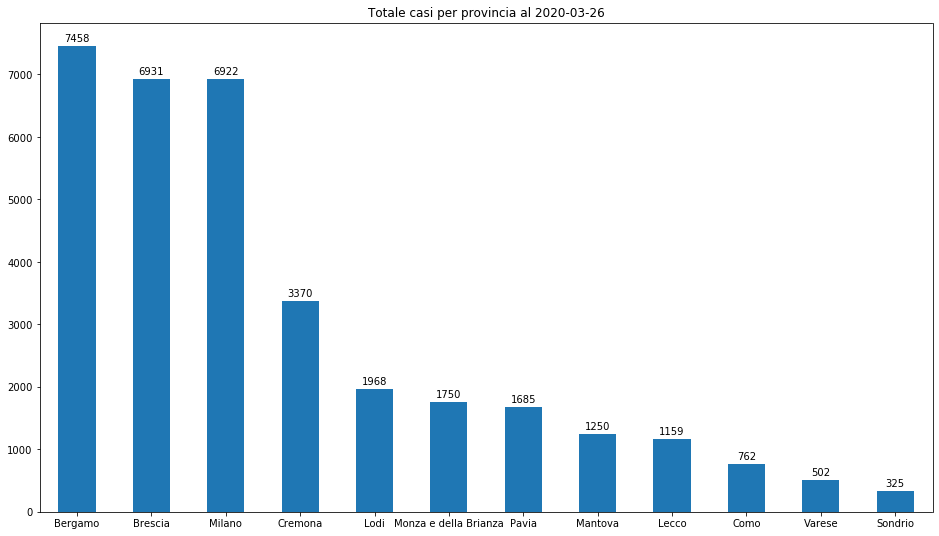

In [241]:
#Load csv
pcProvinciaDataset = pd.read_csv("../../Datasets/ProtezioneCivile/dpc-covid19-ita-province_clean.csv")

#Get value of date
date = pcProvinciaDataset['data'].iloc[-1]

#get province lombarde
provinceLombardia = pcProvinciaDataset[pcProvinciaDataset['denominazione_regione']=='Lombardia']
lastDayProvinceL = provinceLombardia[provinceLombardia['data'] == date].copy()
lastDayProvinceL.sort_values(by='totale_casi',inplace=True,ascending=False)
totaleCasiLastDayProvince = lastDayProvinceL['totale_casi']

#get x label
x_label = lastDayProvinceL['denominazione_provincia'].tolist()

#Create plot
fig, ax = plt.subplots(figsize=(16,9))
ax = totaleCasiLastDayProvince.plot.bar(title='Totale casi per provincia al '+date,rot = 0)

#add x labels
plt.xticks(np.arange(len(x_label)), x_label)

#In order to have same vertical shifts between all bars top value
not_so_beautifull_vertical_shift = int(max(totaleCasiLastDayProvince.tolist())) * 0.01

#write column values over them
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()+not_so_beautifull_vertical_shift), ha='center')

#Show plot
plt.show()

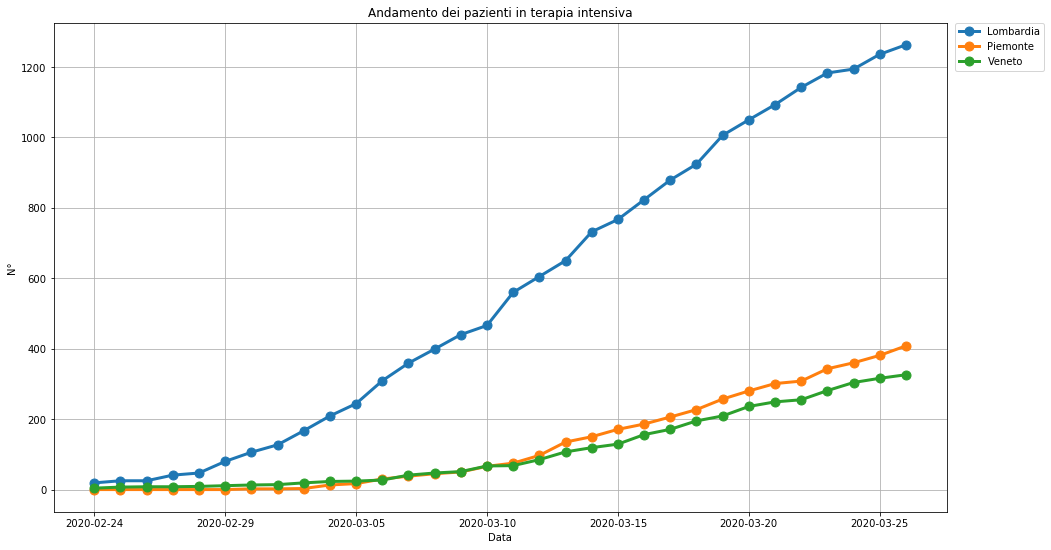

<Figure size 432x288 with 0 Axes>

In [45]:
#load csv
ts_regioni = pd.read_csv("../../Datasets/ProtezioneCivile/ts_regioni_terapia.csv")
ts_regioni=ts_regioni.sort_values(ts_regioni.columns[-1],ascending=False)
ts_regioni =ts_regioni.iloc[:3]
ts_regioni.set_index('denominazione_regione',inplace=True)

#Get list of dates (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

label_regioni = ts_regioni.index.tolist()

top_1 = ts_regioni.iloc[0].values.tolist()
top_2 = ts_regioni.iloc[1].values.tolist()
top_3 = ts_regioni.iloc[2].values.tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label=label_regioni[0],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_2,label=label_regioni[1],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_3,label=label_regioni[2],linewidth=3.0,marker='o',markersize=9)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti in terapia intensiva' )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

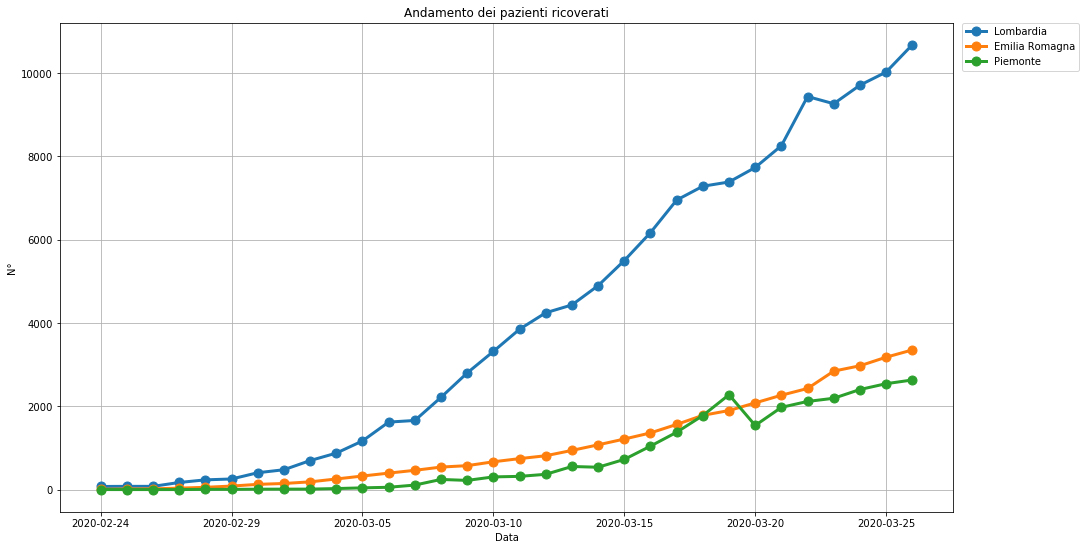

In [46]:
#load csv
ts_regioni = pd.read_csv("../../Datasets/ProtezioneCivile/ts_regioni_ricoverati.csv")
ts_regioni=ts_regioni.sort_values(ts_regioni.columns[-1],ascending=False)
ts_regioni =ts_regioni.iloc[:3]
ts_regioni.set_index('denominazione_regione',inplace=True)

#Get list of dates (X axis)
date = ts_regioni.columns.tolist()
maxDate = max(date)

label_regioni = ts_regioni.index.tolist()

top_1 = ts_regioni.iloc[0].values.tolist()
top_2 = ts_regioni.iloc[1].values.tolist()
top_3 = ts_regioni.iloc[2].values.tolist()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label=label_regioni[0],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_2,label=label_regioni[1],linewidth=3.0,marker='o',markersize=9)
ax.plot(date, top_3,label=label_regioni[2],linewidth=3.0,marker='o',markersize=9)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti ricoverati' )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()

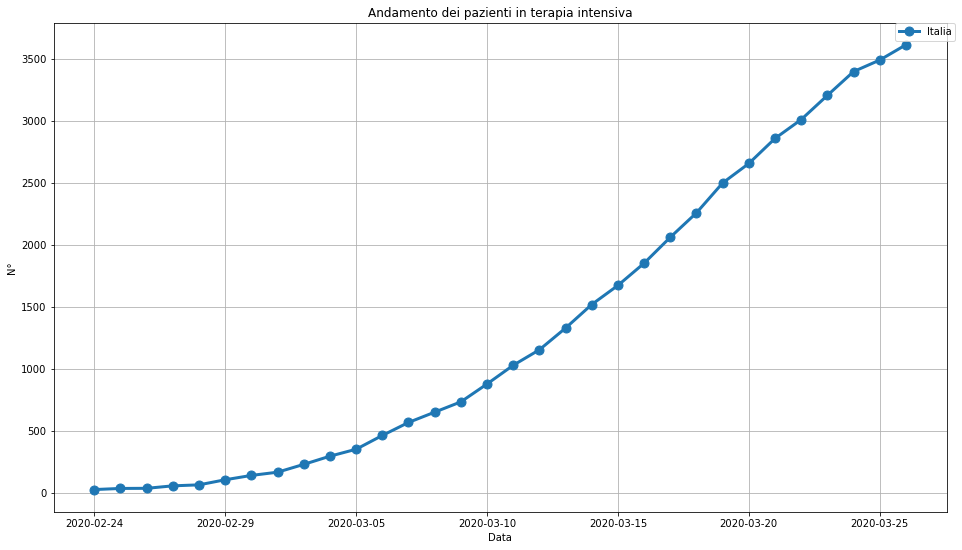

In [55]:
#load csv
ts_nazione = pd.read_csv("../../Datasets/ProtezioneCivile/ts_nazioni_terapia.csv")
ts_nazione.set_index(ts_nazione.columns[0],inplace=True)

#Get list of dates (X axis)
date = ts_nazione.columns.tolist()
maxDate = max(date)


top_1 = ts_nazione.iloc[0].values.tolist()


#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label='Italia',linewidth=3.0,marker='o',markersize=9)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti in terapia intensiva' )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()


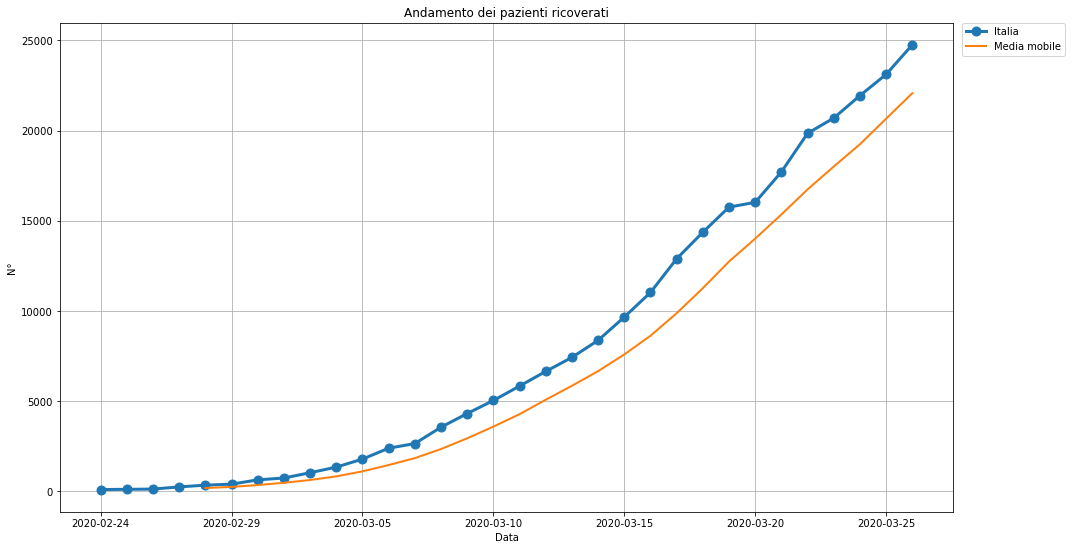

In [59]:
#load csv
ts_nazione = pd.read_csv("../../Datasets/ProtezioneCivile/ts_nazioni_ricoverati.csv")
ts_nazione.set_index(ts_nazione.columns[0],inplace=True)

#Get list of dates (X axis)
date = ts_nazione.columns.tolist()
maxDate = max(date)


top_1 = ts_nazione.iloc[0].values.tolist()
rolling_mean = ts_nazione.iloc[0].T.rolling(window=5).mean()

#Create the plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(date, top_1,label='Italia',linewidth=3.0,marker='o',markersize=9)
ax.plot(date, rolling_mean,label='Media mobile',linewidth=2.0)

#Customize
ax.set(xlabel = 'Data', ylabel = 'N°', title = 'Andamento dei pazienti ricoverati' )
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()

#Add Legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0.)

#Show plot
plt.show()
